In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load or read a dataset using pandas
flight=pd.read_csv("D:\\flight data.csv")
#print first 5 rows 
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
#print last 5 rows
flight.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [3]:
#checking for missing or null values
flight.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
#remove index
flight.head().style.hide(axis='index')

Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.330000,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.250000,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1,5955


In [5]:
#some information about the data
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
#statistics summary transpose view
flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [7]:

#statistical summary of object
flight.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [8]:
#what are the airlines in the dataset,accompanied by their frequencies?
Airline=flight['airline'].value_counts()
Airline

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7220\2785234941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Airline.index, y=Airline.values, palette='viridis')


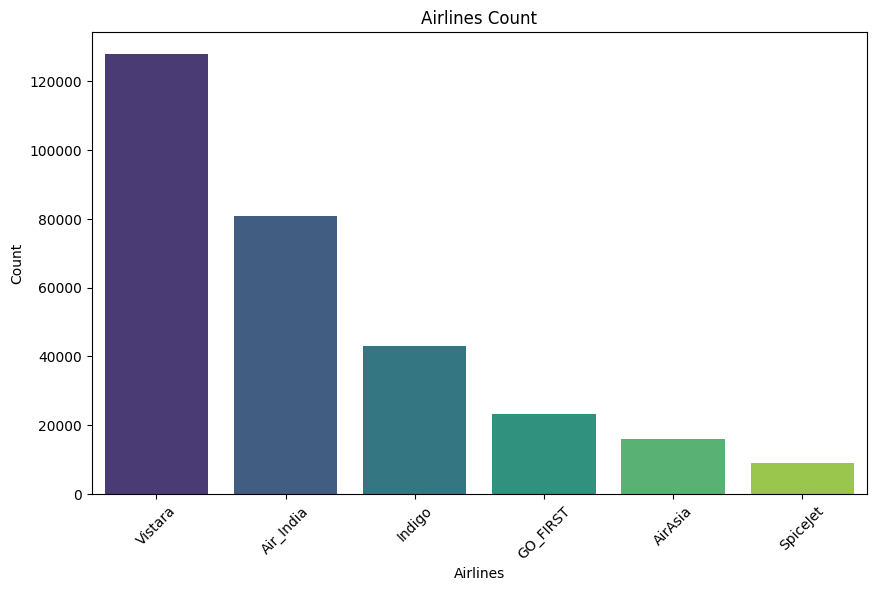

In [9]:

plt.figure(figsize=(10, 6))
sns.barplot(x=Airline.index, y=Airline.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Airlines Count")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.show()

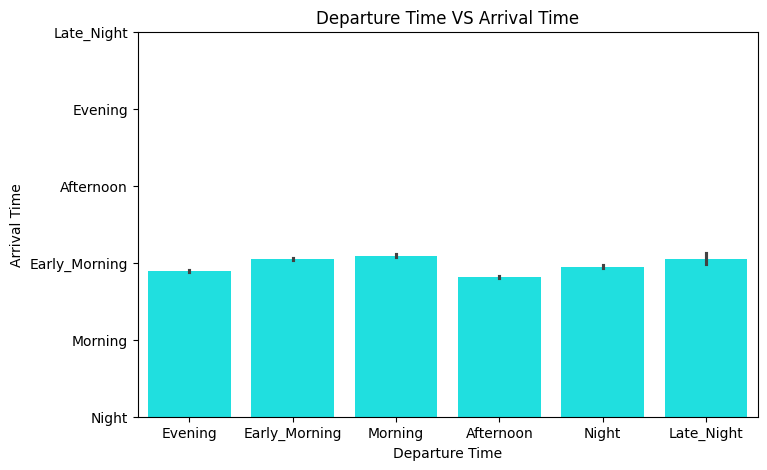

In [10]:
#Departure Time Against Arrival Time using Barplot.
plt.figure(figsize=(8,5))
sns.barplot(flight,x='departure_time', y='arrival_time', color='cyan')
plt.title('Departure Time VS Arrival Time')
plt.xlabel('Departure Time')
plt.ylim(0,5)
plt.ylabel('Arrival Time')
plt.show()


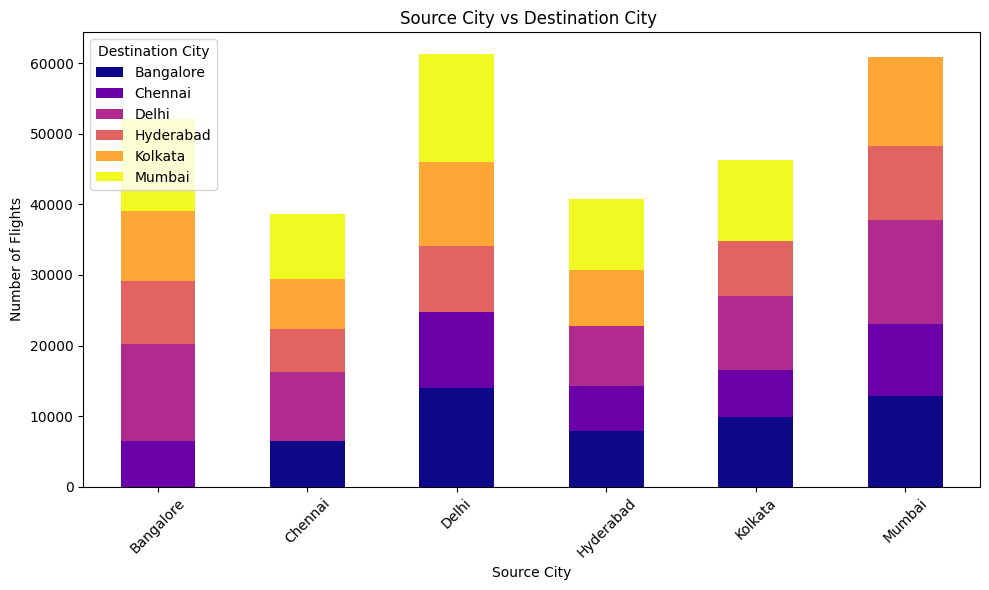

In [21]:
#Source City Against Destination_city.
data = flight.groupby(['source_city', 'destination_city']).size().unstack()
data.plot(kind='bar',stacked=True, figsize=(10, 6), colormap='plasma')

plt.title('Source City vs Destination City ')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Destination City')
plt.tight_layout()
plt.show()



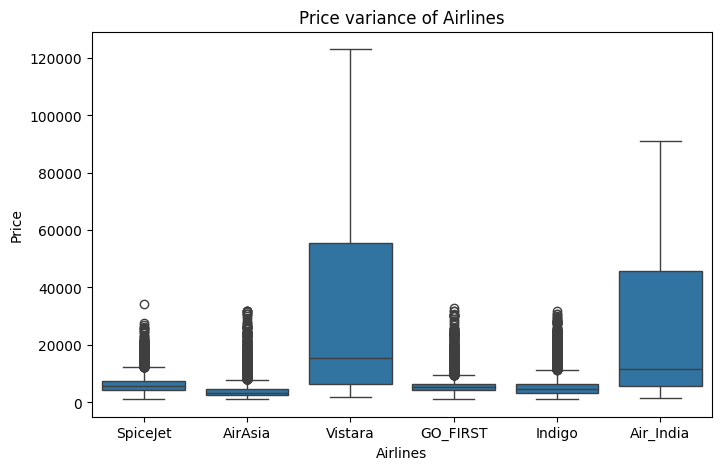

In [12]:
#Does price vary with airlines?
plt.figure(figsize=(8,5))
sns.boxplot(flight,x='airline', y='price')
plt.title('Price variance of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()


In [13]:
#remove outliers using log method, it is used for one sided outlier
flight['price']=np.log1p(flight['price'])

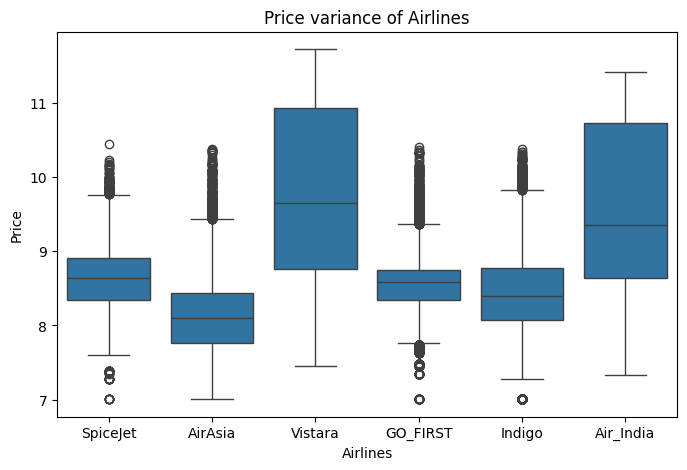

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(flight,x='airline', y='price')
plt.title('Price variance of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()


In [15]:
#IQR for double sided
Q1=flight['price'].quantile(0.25)
Q2=flight['price'].quantile(0.50)
Q3=flight['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
filter=flight[(flight['price']>=lower_bound)&(flight['price']<=upper_bound)]


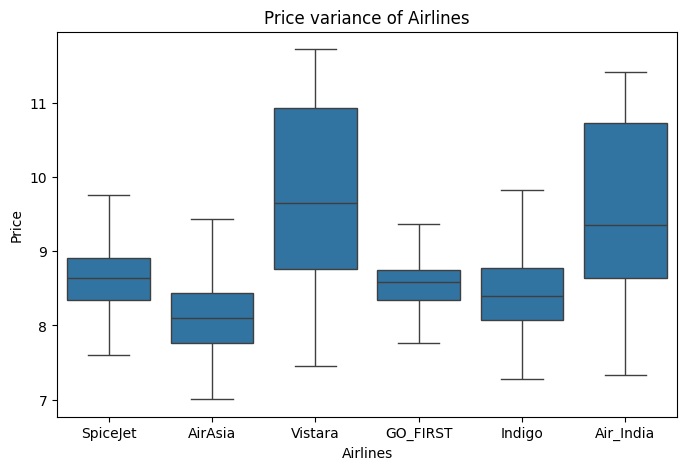

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(flight,x='airline', y='price', showfliers=False)
plt.title('Price variance of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()


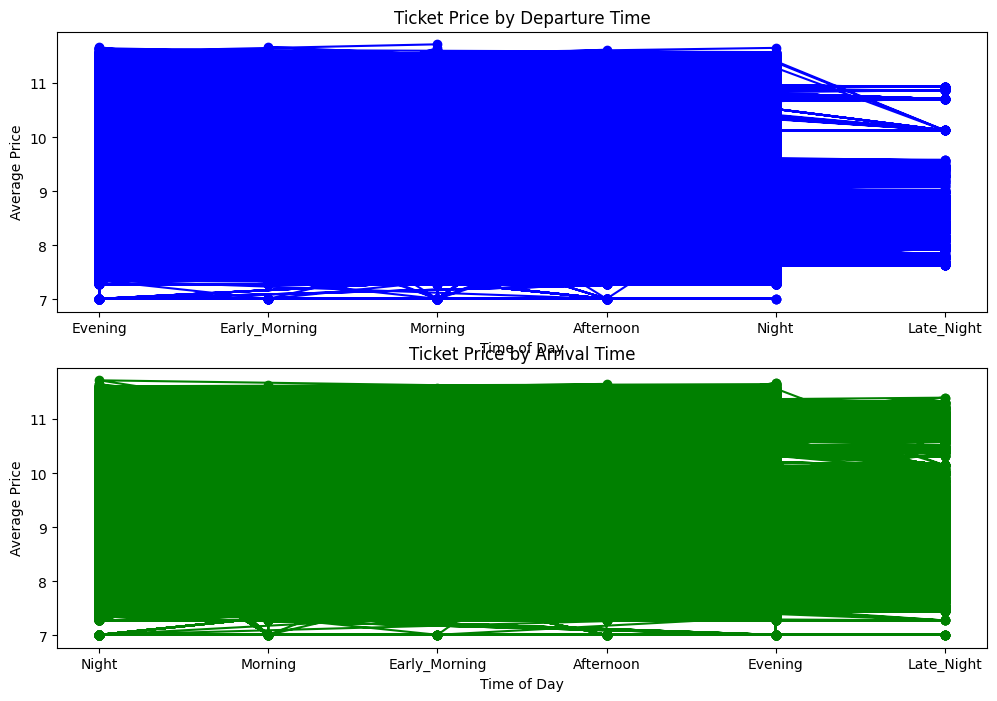

In [23]:
#Does ticket price change based on the departure time and arrival time using the line plot?
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(flight['departure_time'], flight['price'], marker='o', color='blue')
plt.title('Ticket Price by Departure Time')
plt.xlabel('Time of Day')
plt.ylabel('Average Price')
plt.xticks(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.subplot(2, 1, 2)
plt.plot(flight['arrival_time'], flight['price'], marker='o', color='green')
plt.title('Ticket Price by Arrival Time')
plt.xlabel('Time of Day')
plt.ylabel('Average Price')
plt.xticks(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.show()

Text(0.5, 1.0, 'Price changes with source and destination of cities')

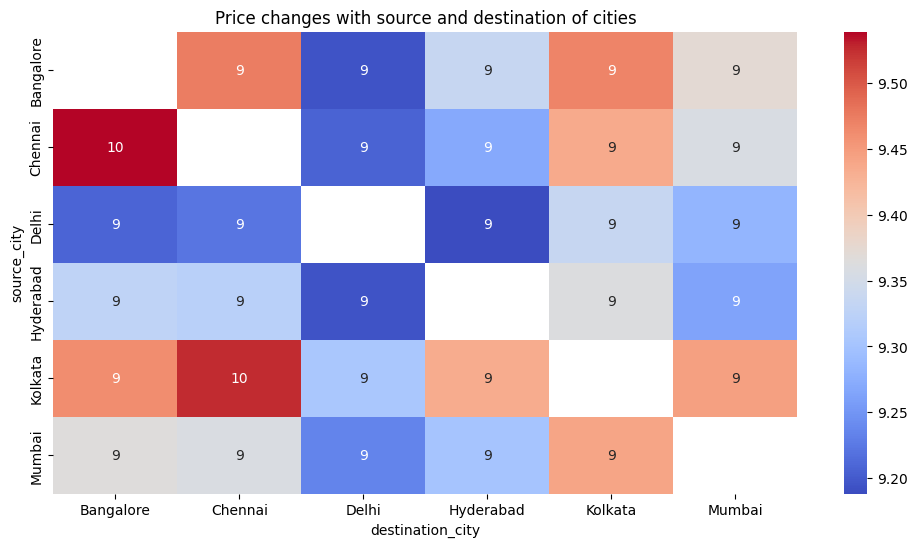

In [18]:
#How the price changes with change in source and destination?
plt.figure(figsize=(12,6))
aggragated=flight.groupby(['source_city','destination_city'])['price'].mean().reset_index()
pivot=aggragated.pivot(index='source_city', columns='destination_city',values='price') 
sns.heatmap(pivot, annot=True, cmap='coolwarm',fmt='.0f')
plt.title('Price changes with source and destination of cities')

Text(0.5, 1.0, 'Duration of travel vs city')

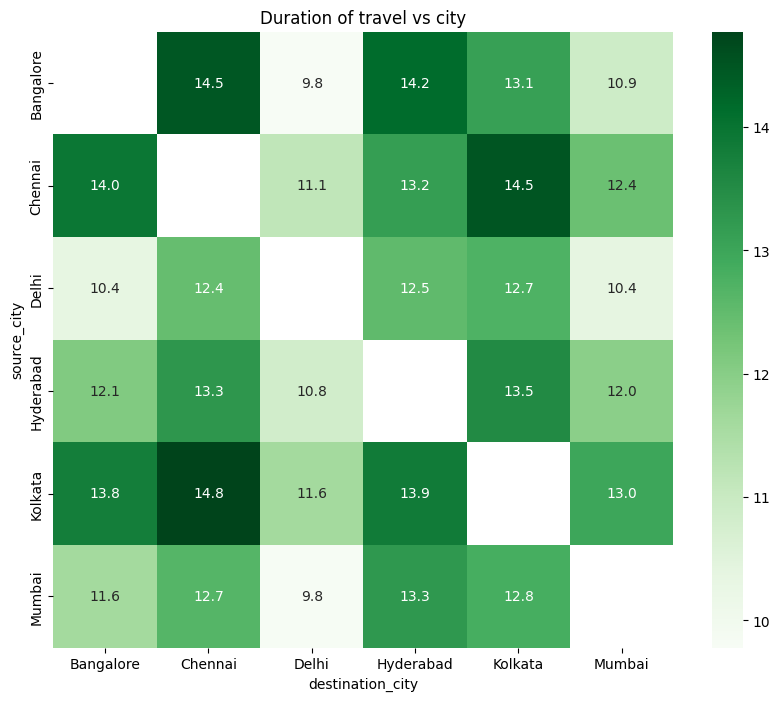

In [19]:
#Duration of travel vs city
mean=flight.groupby(['source_city','destination_city'])['duration'].mean().reset_index()
plt.figure(figsize=(10,8))
table=mean.pivot_table(index='source_city', columns='destination_city', values='duration')
sns.heatmap(table, annot=True, cmap='Greens', fmt='.1f', )
plt.title("Duration of travel vs city")


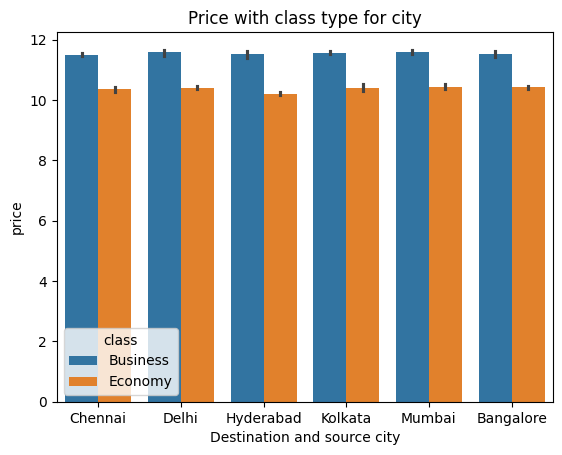

In [20]:
#show the high price with class type for city
high_price=flight.groupby(['source_city','destination_city','class'])['price'].max().reset_index()
sns.barplot(high_price, x='destination_city', y='price', hue='class')
plt.title('Price with class type for city')
plt.xlabel('Destination and source city')
plt.ylabel('price')
plt.show()
